# Exercises I - Required
Our Telco scenario continues:

As a customer analyst for Telco, you want to know who has spent the most money with the company over their lifetime. You have monthly charges and tenure, so you think you will be able to use those two attributes as features to estimate total charges. You need to do this within an average of $5.00 per customer.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

Do your work in a notebook named explore.ipynb. In addition, you should create a file named explore.py that contains the following functions for exploring your variables (features & target).


In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from env import host, user, password

# visualize
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

import os
os.path.isfile('telco_df.csv')

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
import sklearn.preprocessing
from sklearn.preprocessing import QuantileTransformer

import wrangle
import prepare
import explore

#1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [22]:
#acquire, prepare, and split dataframe using function from wrangle.py
train, validate, test= wrangle.wrangle_telco()

In [23]:
train.head()# look at first five values

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
4604,3,2,1,5564-NEMQO,Female,1,No,No,1,Yes,...,No,No,No,Yes,75.30,75.30,Yes,Month-to-month,Fiber optic,Bank transfer (automatic)
5566,4,3,3,0825-CPPQH,Female,0,Yes,No,71,Yes,...,No internet service,No internet service,No internet service,No,19.10,1372.45,No,Two year,None,Credit card (automatic)
6204,2,3,2,1561-BWHIN,Male,0,Yes,Yes,19,Yes,...,No internet service,No internet service,No internet service,No,19.80,344.50,No,One year,None,Mailed check
5837,3,3,3,4979-HPRFL,Male,0,Yes,Yes,56,Yes,...,No internet service,No internet service,No internet service,No,24.15,1402.25,No,Two year,None,Bank transfer (automatic)
1276,1,1,1,0749-IRGQE,Female,1,Yes,No,13,No,...,No,Yes,Yes,No,45.30,528.45,No,Month-to-month,DSL,Electronic check


In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 4604 to 6958
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           3943 non-null   int64  
 1   internet_service_type_id  3943 non-null   int64  
 2   contract_type_id          3943 non-null   int64  
 3   customer_id               3943 non-null   object 
 4   gender                    3943 non-null   object 
 5   senior_citizen            3943 non-null   int64  
 6   partner                   3943 non-null   object 
 7   dependents                3943 non-null   object 
 8   tenure                    3943 non-null   int64  
 9   phone_service             3943 non-null   object 
 10  multiple_lines            3943 non-null   object 
 11  online_security           3943 non-null   object 
 12  online_backup             3943 non-null   object 
 13  device_protection         3943 non-null   object 
 14  tech_

In [25]:
#Looking at all columns as a list
train.columns.to_list()

['payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [26]:
# #Setting customer_id as an index instead of an object
# train = train.set_index("customer_id")
# validate = validate.set_index("customer_id")
# test = test.set_index("customer_id")

In [27]:
train.shape, validate.shape, test.shape

((3943, 24), (1691, 24), (1409, 24))

In [28]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_type_id,3943.0,2.314228,1.148938,1.00,1.000,2.00,3.00,4.00
internet_service_type_id,3943.0,1.874715,0.738536,1.00,1.000,2.00,2.00,3.00
contract_type_id,3943.0,1.690591,0.835920,1.00,1.000,1.00,2.00,3.00
senior_citizen,3943.0,0.162059,0.368552,0.00,0.000,0.00,0.00,1.00
tenure,3943.0,32.229267,24.575528,0.00,8.000,29.00,55.00,72.00
monthly_charges,3943.0,64.613594,30.005884,18.55,35.475,70.35,89.65,118.65
total_charges,3943.0,3347.205047,7357.560527,0.00,433.000,1444.65,4085.05,84050.00


In [29]:
# Create the correlation matrix

churn_corr = train.drop(columns=['churn']).corr()
churn_corr

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges
payment_type_id,1.000000,0.002460,0.370144,-0.072364,0.368140,-0.054415,0.119715
internet_service_type_id,0.002460,1.000000,0.098270,-0.024178,-0.040669,-0.329914,-0.086397
contract_type_id,0.370144,0.098270,1.000000,-0.148452,0.673449,-0.079685,0.206741
senior_citizen,-0.072364,-0.024178,-0.148452,1.000000,0.007828,0.219926,0.042761
tenure,0.368140,-0.040669,0.673449,0.007828,1.000000,0.239707,0.382462
monthly_charges,-0.054415,-0.329914,-0.079685,0.219926,0.239707,1.000000,0.292238
total_charges,0.119715,-0.086397,0.206741,0.042761,0.382462,0.292238,1.000000


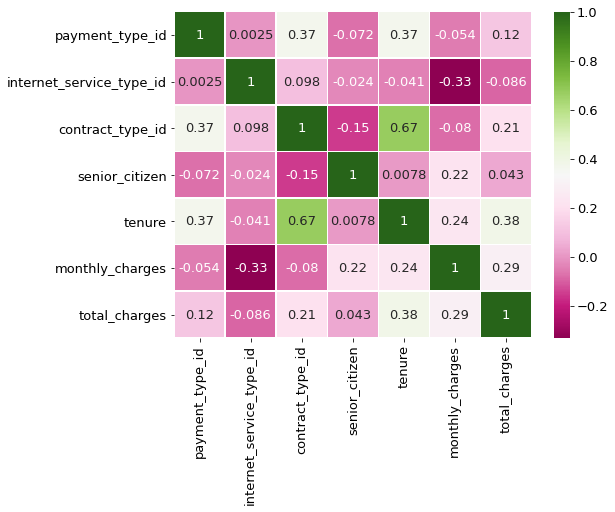

In [30]:
plt.figure(figsize=(8,6))
sns.heatmap(churn_corr, cmap='PiYG', annot=True, linewidth=0.5)

plt.show()

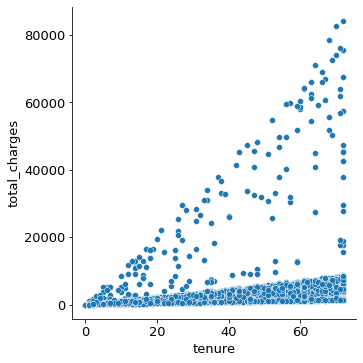

In [38]:
#visulizing relationship total charges with tenure
sns.relplot(x= 'tenure', y= 'total_charges', data=train, kind='scatter')

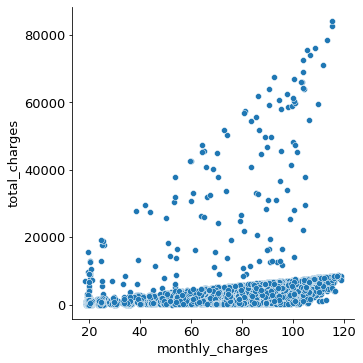

In [41]:
#visulizing relationship total charges with monthly_charges
sns.relplot(x= 'monthly_charges', y= 'total_charges', data=train, kind='scatter')

#2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [156]:
#Function that plots all of the pairwise relationships along with the regression line for each pair
def plot_variable_pairs(ds):
    '''
    This function takes in the telco train dataset and returns 2 lmplots (scatterplots with a regression line). 
    The first plot shows the relationship between tenure and total_charges. 
    The second plot shows the relationship between monthly_charges and total_charges.
    '''
    #lmplot of tenure with total_charges with tenure
    sns.lmplot(x="tenure", y="total_charges", data=ds,line_kws={'color': 'purple'})
    plt.show()
    #lmplot of tenure with total_charges with monthly_charges
    sns.lmplot(x="monthly_charges", y="total_charges", data=ds, line_kws={'color': 'purple'})
    plt.show();

In [166]:
#lmplot of tenure with total_charges with tenure
sns.lmplot(x="tenure", y="total_charges", data=train, line_kws={'color': 'purple'})
plt.show()

In [101]:
#lmplot of tenure with total_charges with monthly_charges
sns.lmplot(x="monthly_charges", y="total_charges", data=train, line_kws={'color': 'purple'})
plt.show()

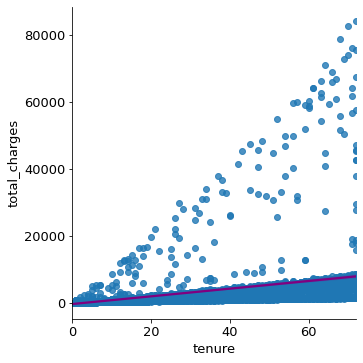

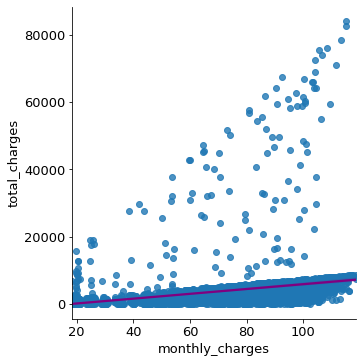

In [157]:
#Verifying new function works
plot_variable_pairs(train)

In [154]:
def plot_variable_pairs2(ds):
    '''
    This function takes in the telco train dataset and returns 2 lmplots (scatterplots with a regression line). 
    The first plot shows the pairwise relationship between tenure, monthly_charges, and total_charges.
    - arguments:
    - ds: dataset or dataframe
    '''
    sns.pairplot(train[['tenure', 'monthly_charges', 'total_charges']], corner=True, kind= 'reg', plot_kws={'line_kws':{'color':'purple'}})
    plt.show();

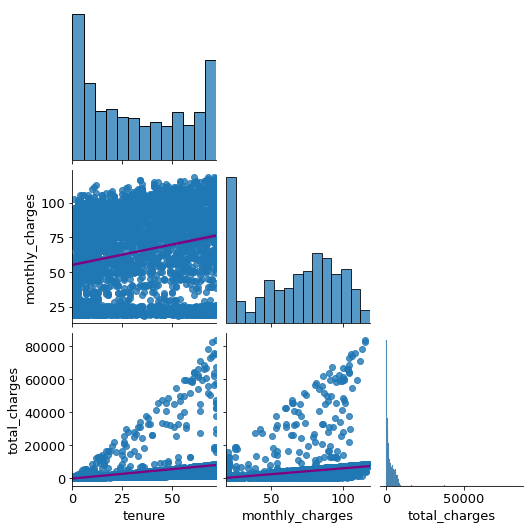

In [155]:
plot_variable_pairs2(train)

In [107]:
#Using sns.pairplot for pairwise relationship plots
# sns.pairplot(train[['tenure', 'monthly_charges', 'total_charges']], corner=True, kind= 'reg', plot_kws={'line_kws':{'color':'purple'}})
# plt.show()

#3. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

In [68]:
def months_to_years(ds):
    ds['tenure_years'] = ds.tenure / 12;
    

In [69]:
# add column for tenure in years
# train['tenure_years'] = train.tenure / 12
# train.info()

In [71]:
#Using function
months_to_years(train)

In [72]:
#Verifying function worked and tenure_years was added
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 4604 to 6958
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           3943 non-null   int64  
 1   internet_service_type_id  3943 non-null   int64  
 2   contract_type_id          3943 non-null   int64  
 3   customer_id               3943 non-null   object 
 4   gender                    3943 non-null   object 
 5   senior_citizen            3943 non-null   int64  
 6   partner                   3943 non-null   object 
 7   dependents                3943 non-null   object 
 8   tenure                    3943 non-null   int64  
 9   phone_service             3943 non-null   object 
 10  multiple_lines            3943 non-null   object 
 11  online_security           3943 non-null   object 
 12  online_backup             3943 non-null   object 
 13  device_protection         3943 non-null   object 
 14  tech_

#4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [117]:
#Creating a list for categorical variables and a list for continuous variable
# cat_vars = ['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'gender', 'senior_citizen', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup','device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'contract_type', 'internet_service_type', 'payment_type']
# cont_vars = ['monthly_charges', 'total_charges', 'tenure', 'tenure_years']

In [143]:
def plot_quant(ds, cont_vars):
    '''
    This function takes in the train dataset, and continuous variable column list
    and ouputs the list as a plot.
    arguments: 
    - ds= dataset you want to input (typically the train dataset)
    - cont_vars= continuous variable list of columns
    '''
    #list of continuous variables
    cont_vars = ['monthly_charges', 'total_charges', 'tenure', 'tenure_years']
    for col in list(ds.columns):
            
            if col in cont_vars:
                sns.barplot(data = ds, y = col, color='aquamarine')
                plt.show()

def plot_cat(ds, cat_vars):
    '''
    This function takes in the train dataset, and categorical variable column list
    and ouputs the list as a plot.
    arguments: 
    - ds= dataset you want to input (typically the train dataset)
    - cat_vars= categorical variable list of columns
    '''
    #list of categorical variables
    cat_vars = ['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'gender', 'senior_citizen', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup','device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'contract_type', 'internet_service_type', 'payment_type']
    for col in list(ds.columns):
        if col in cat_vars:
            sns.countplot(ds[col], palette='Accent')
            plt.show()

In [144]:
def plot_categorical_and_continuous_vars(ds, cat_vars, cont_vars):
    
    '''
    This function takes in the train dataset, categorical variable column list, and continuous variable column list
    and ouputs the lists as plots.
    arguments: 
    - ds= dataset you want to input (typically the train dataset)
    - cat_vars= categorical variable list of columns
    - cont_vars= continuous variable list of columns
    '''
    
    plot_cat(ds, cat_vars)
    
    plot_quant(ds, quant_vars);

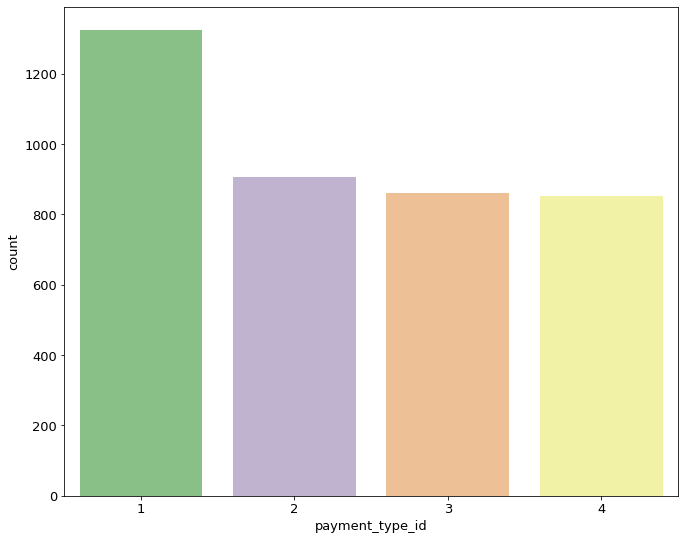

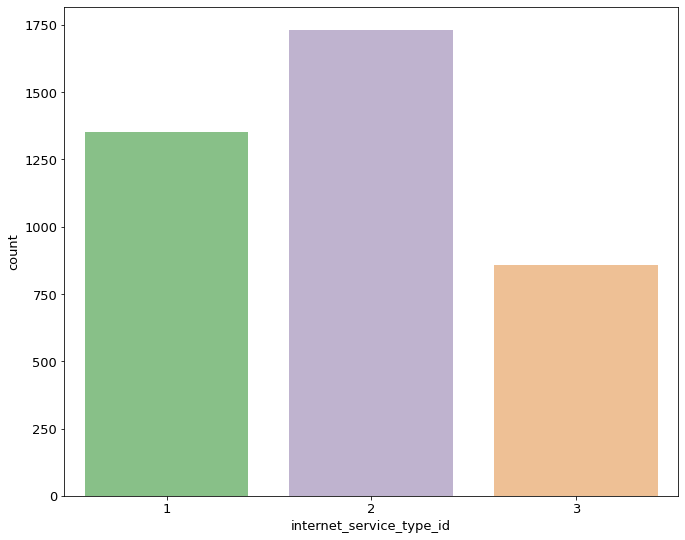

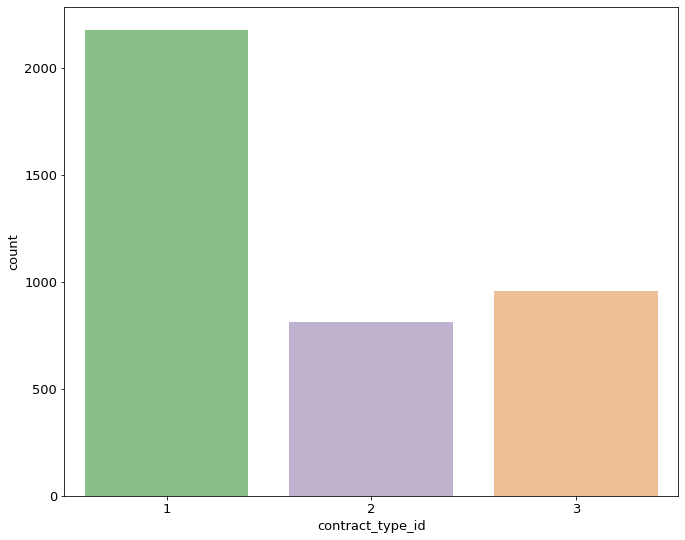

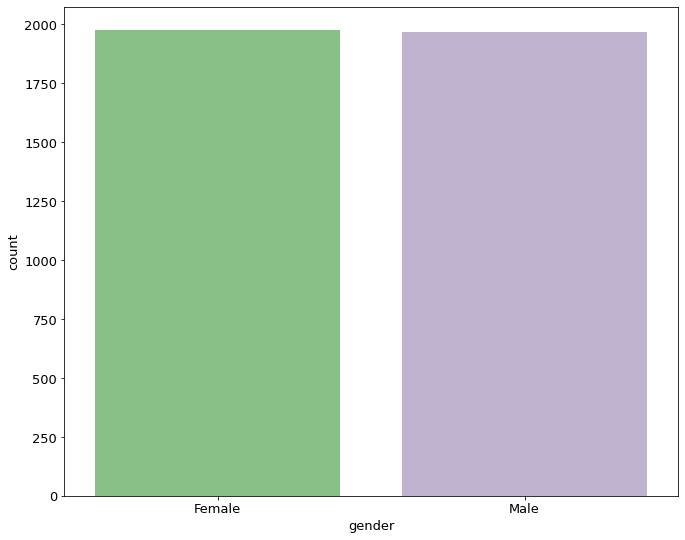

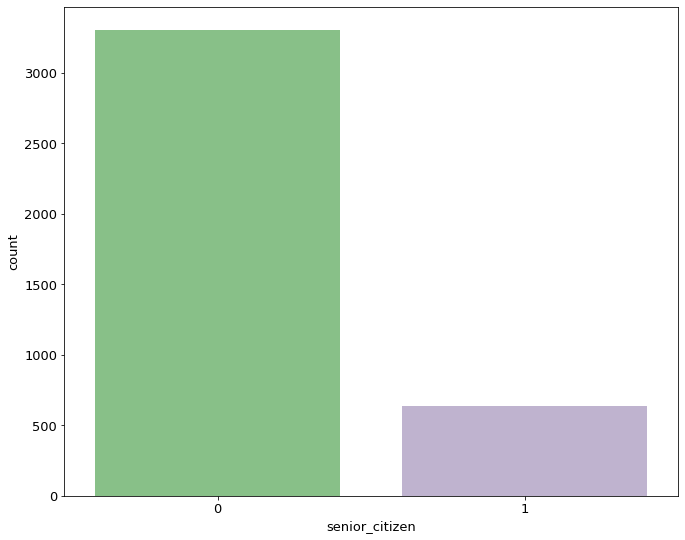

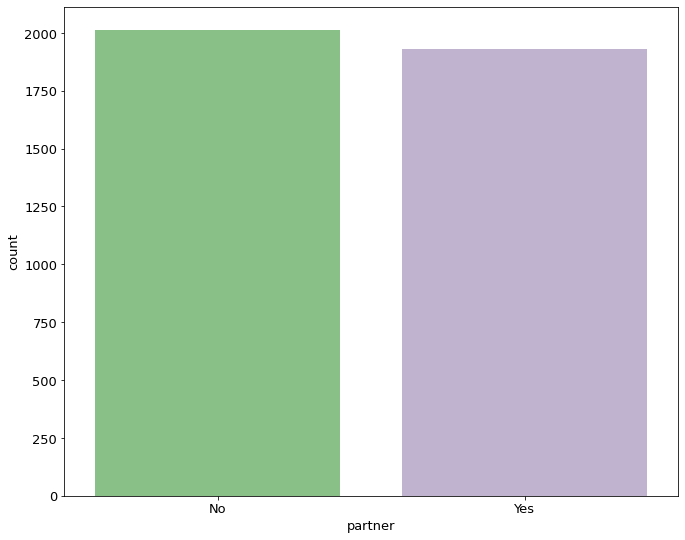

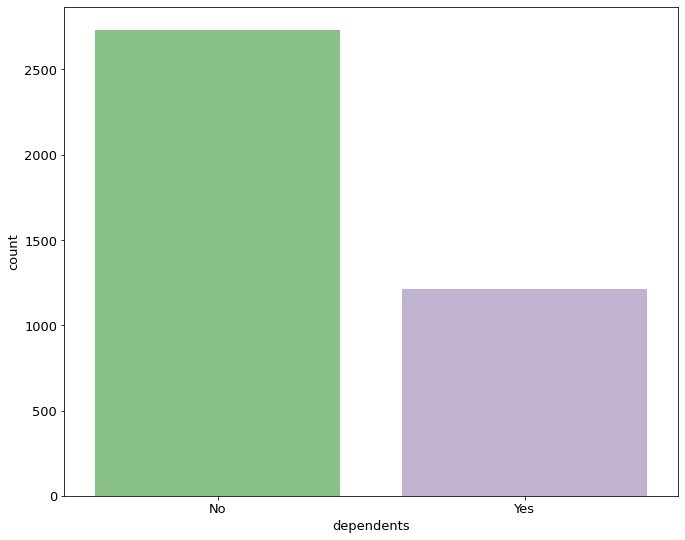

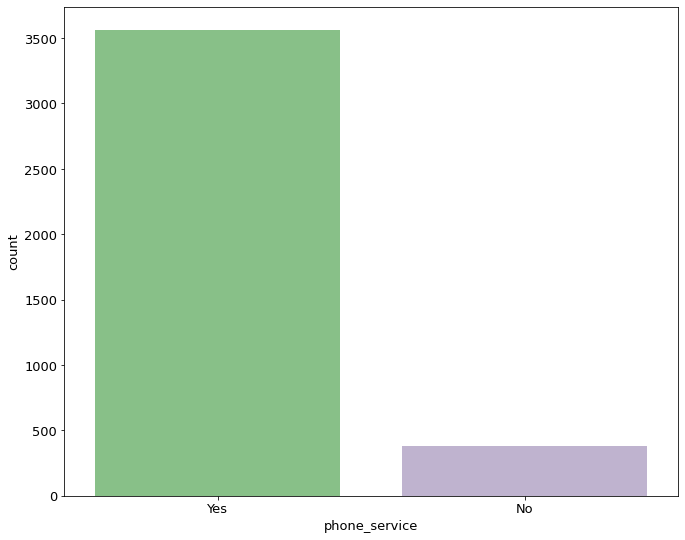

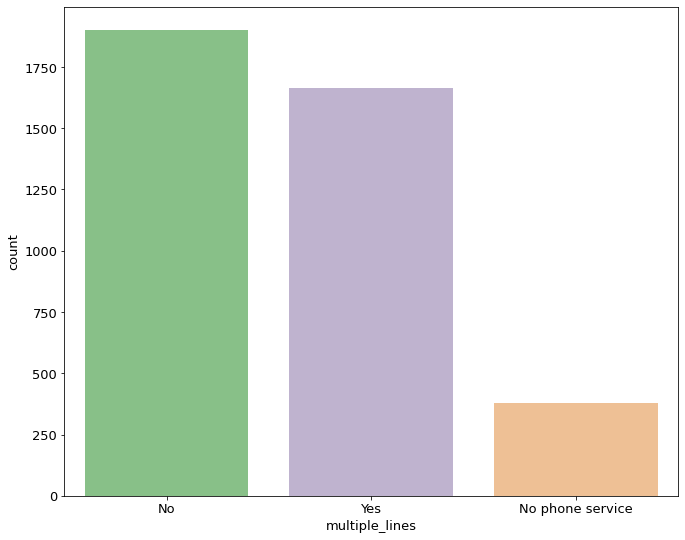

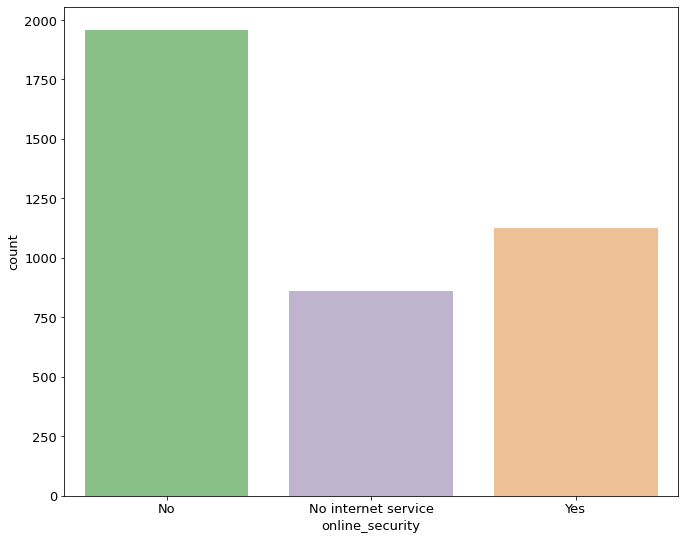

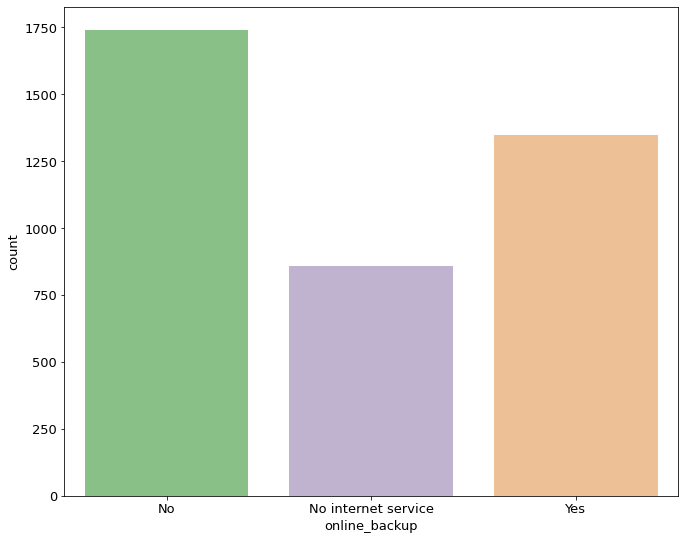

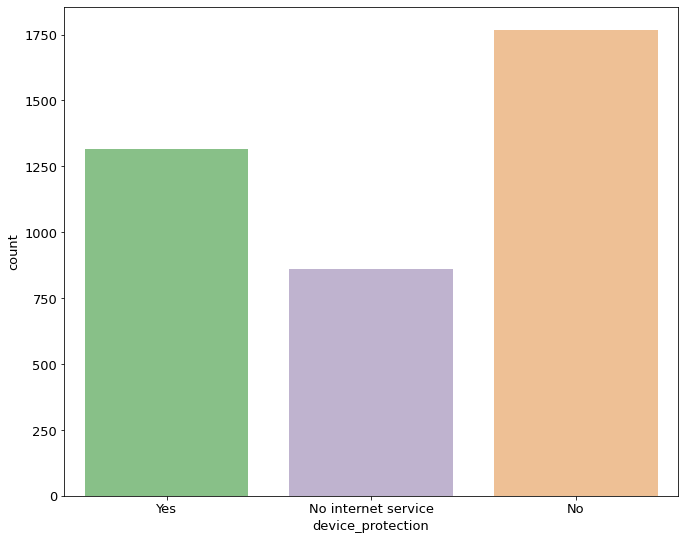

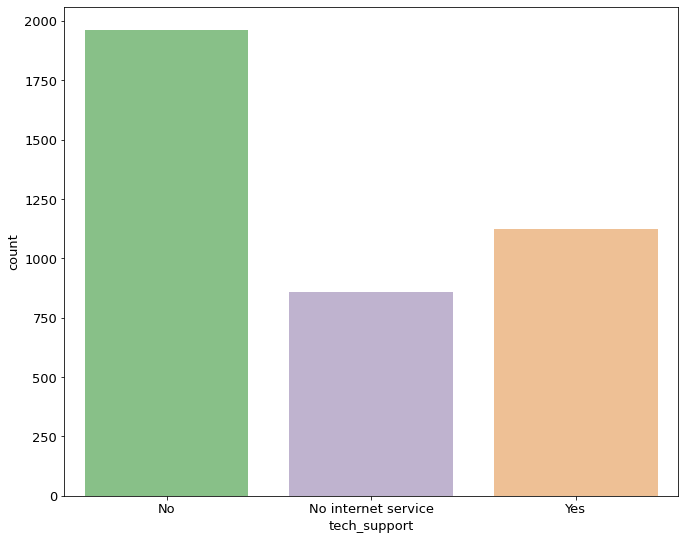

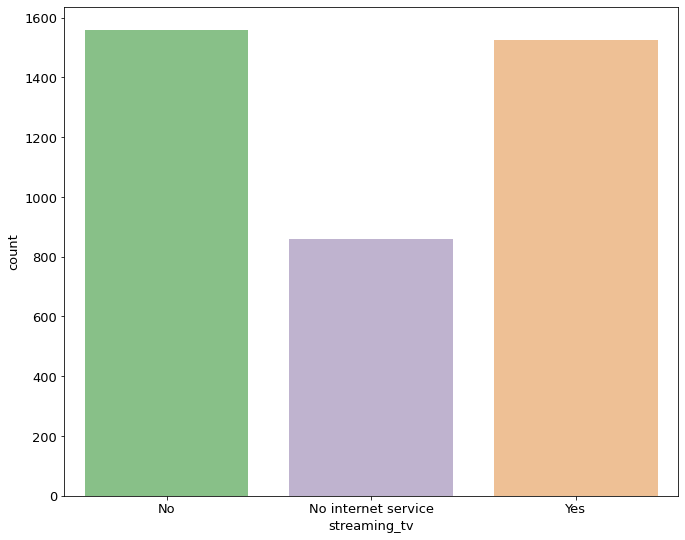

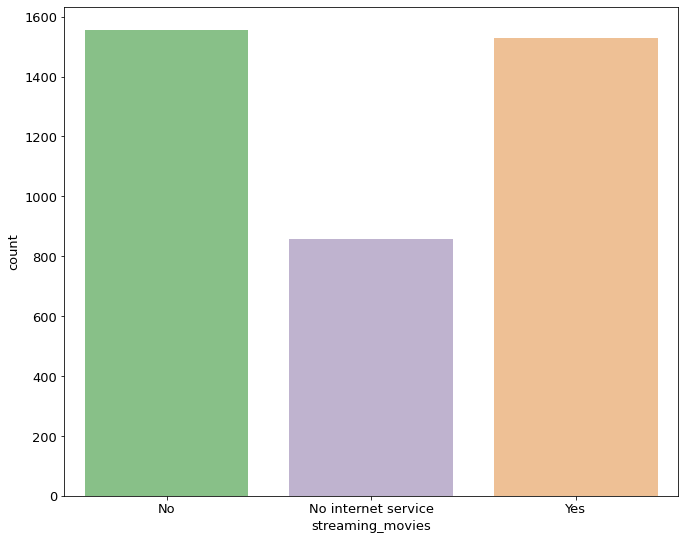

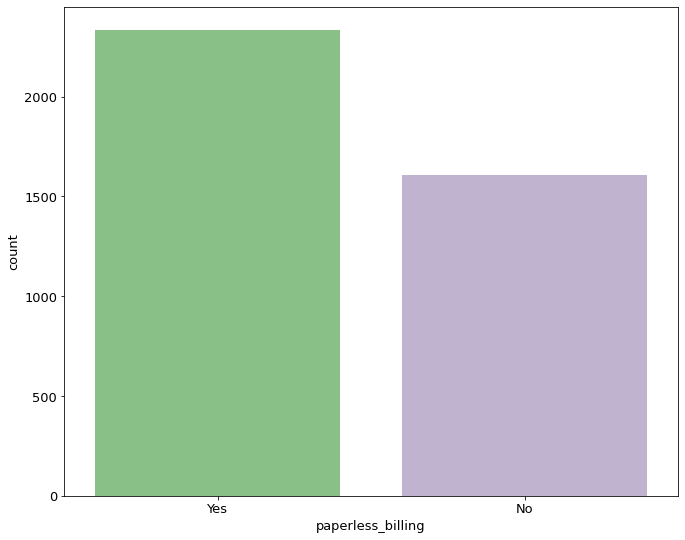

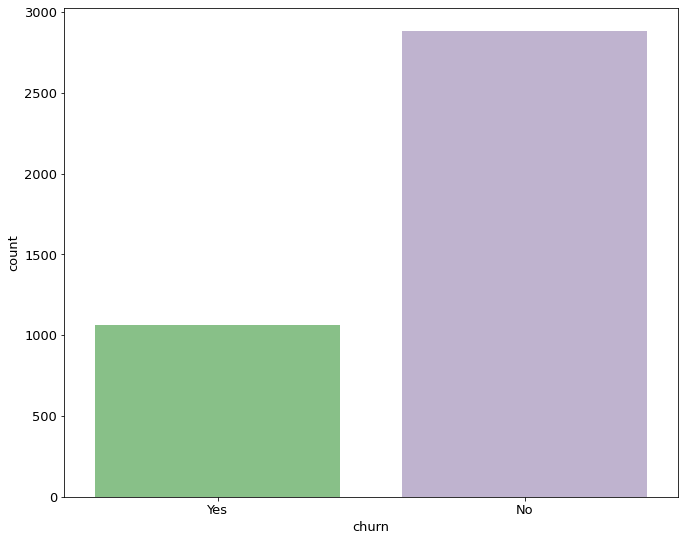

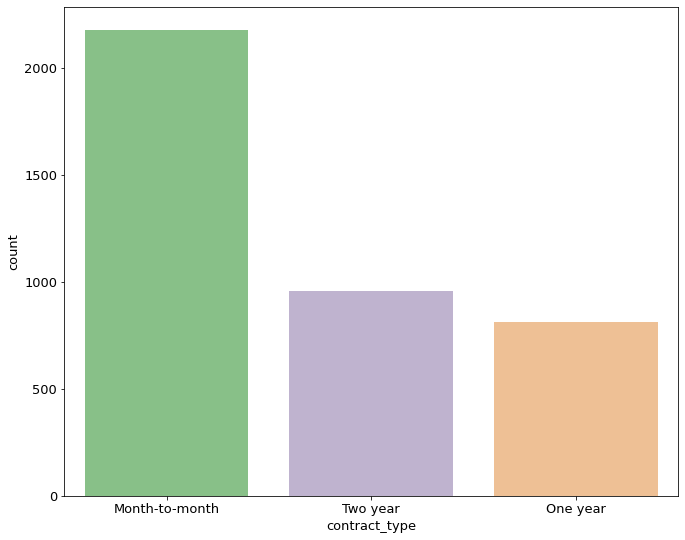

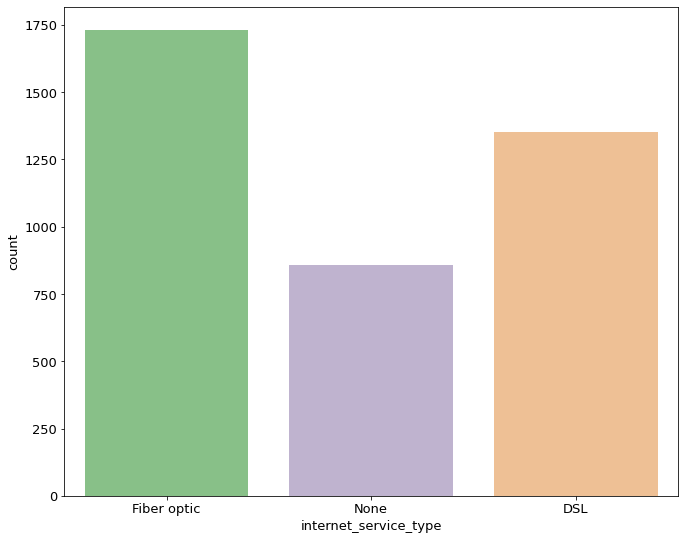

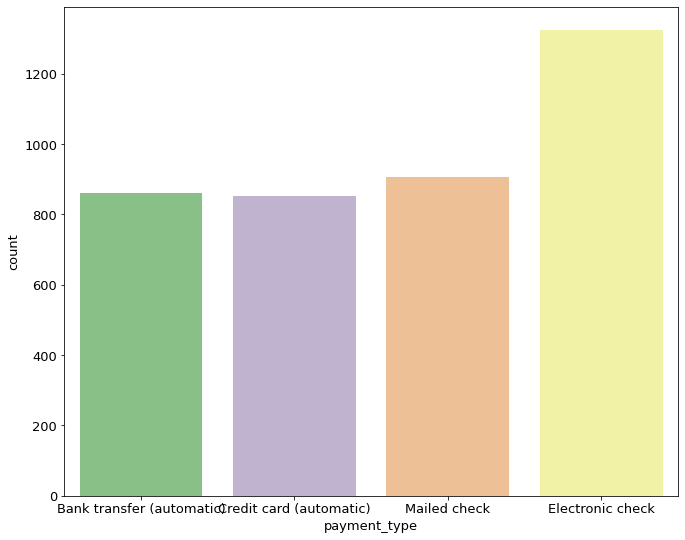

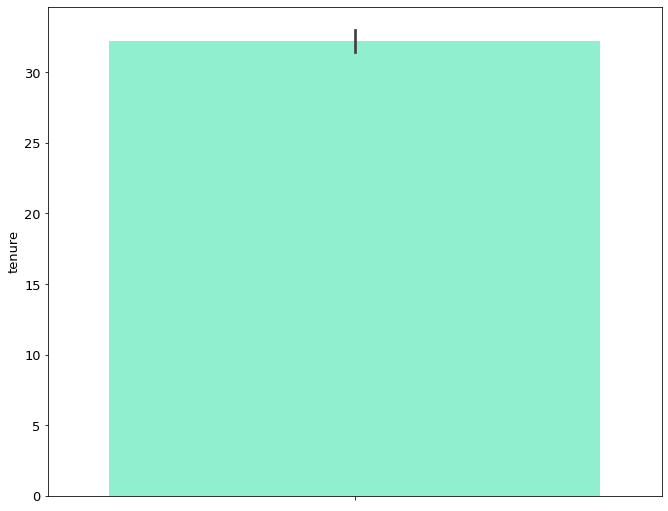

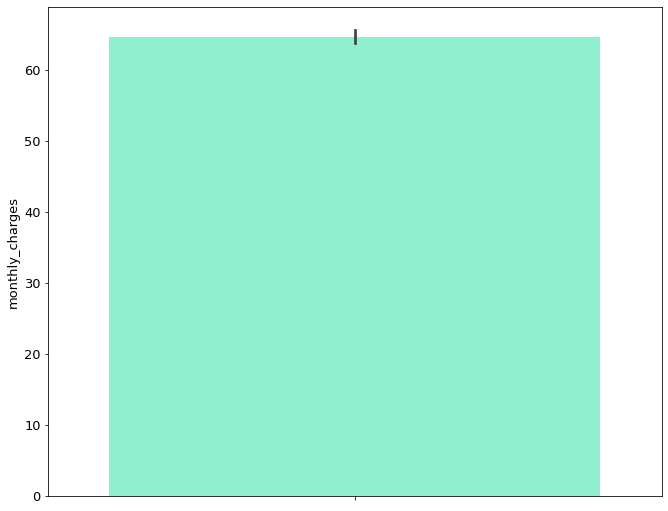

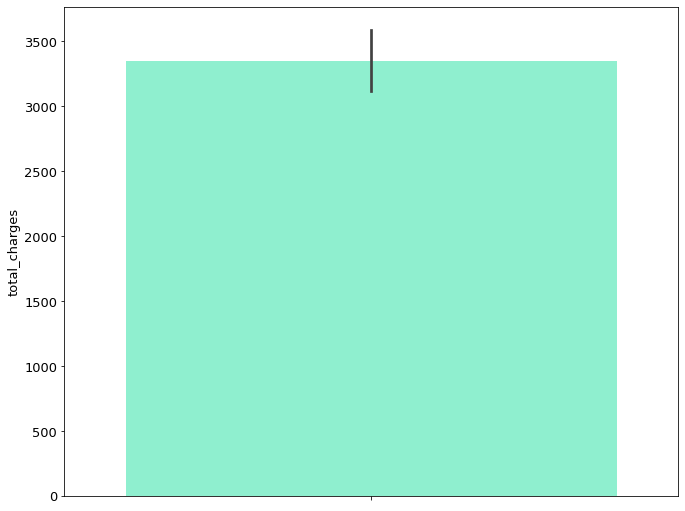

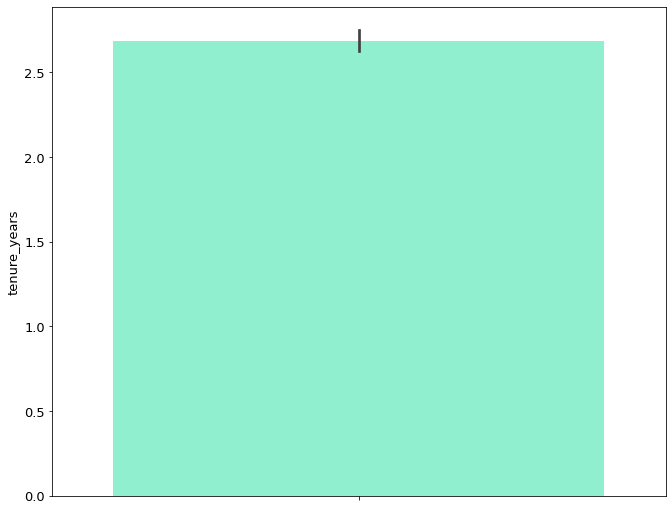

In [145]:
plot_categorical_and_continuous_vars(train, cat_vars, cont_vars)

#5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

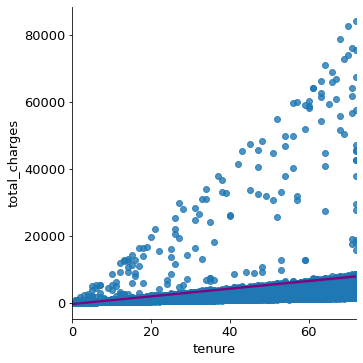

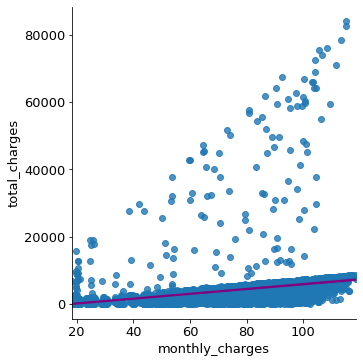

In [122]:
#verifying functions from import file works
explore.plot_variable_pairs(train)

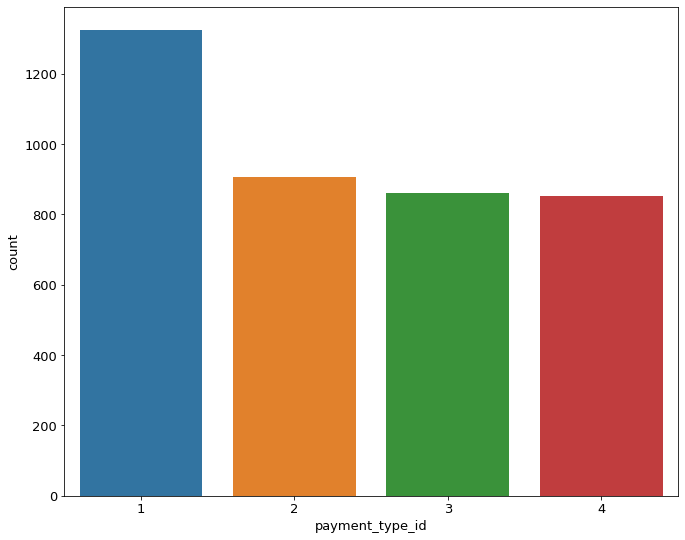

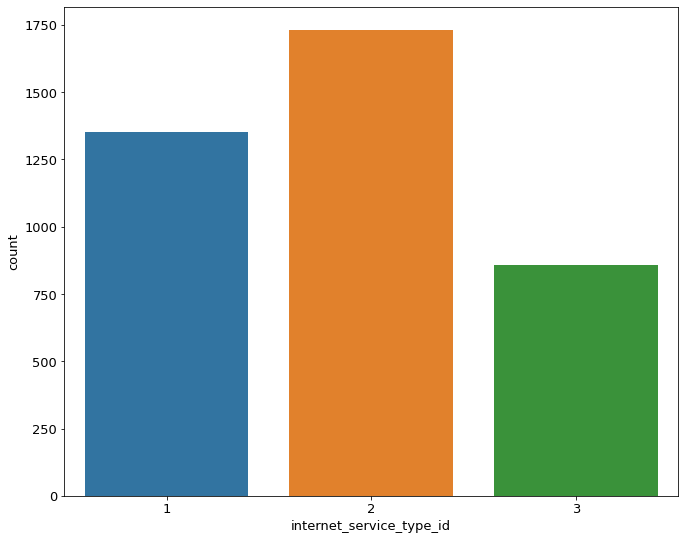

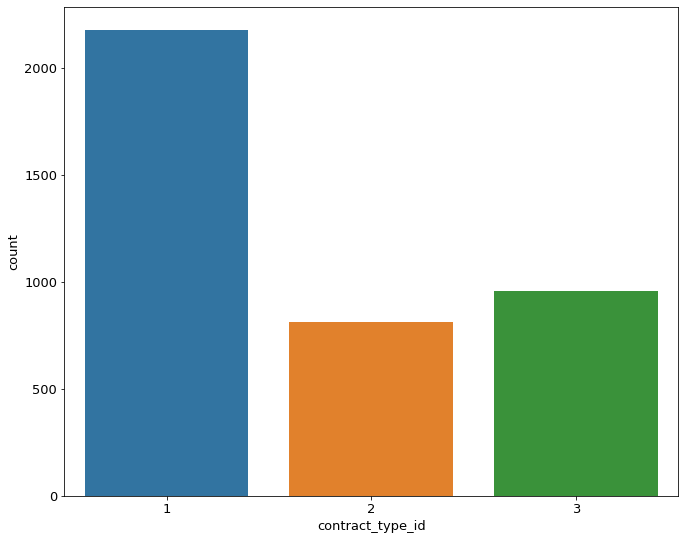

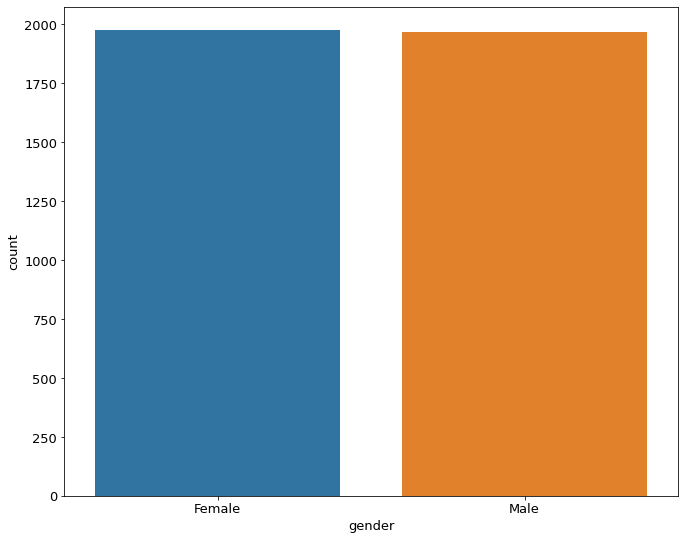

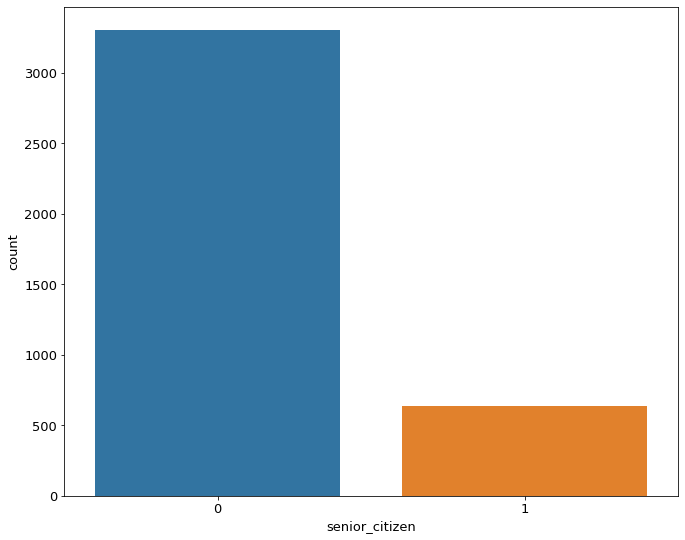

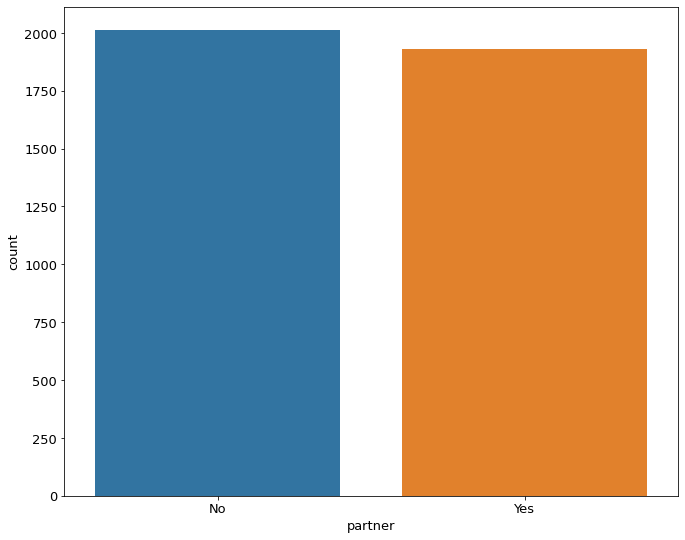

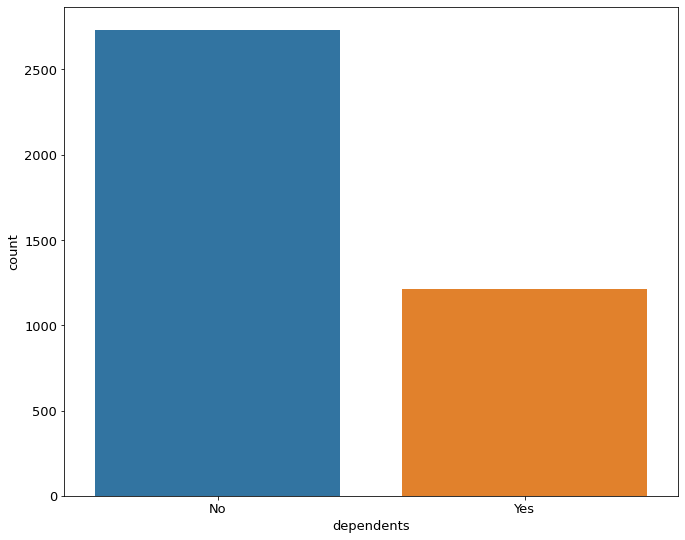

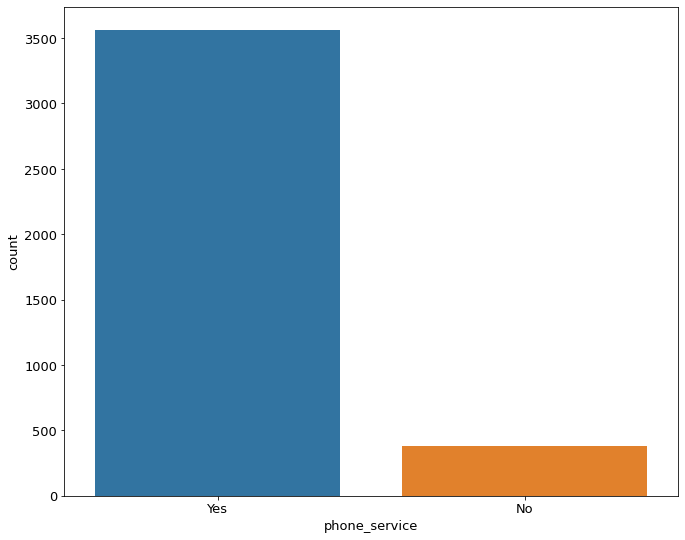

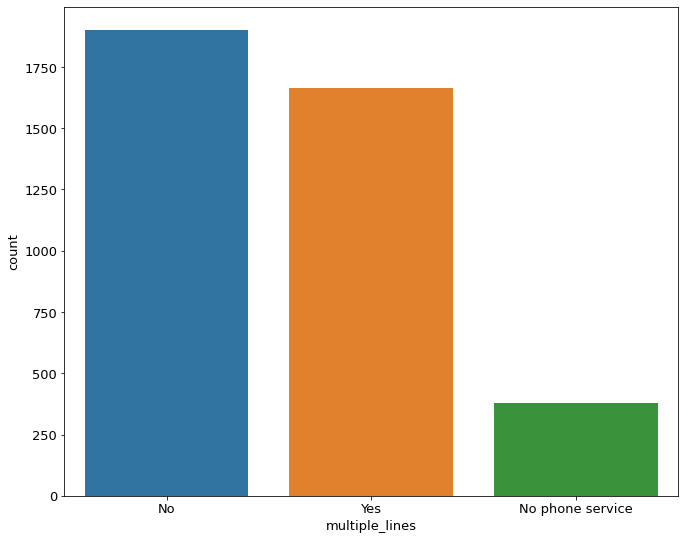

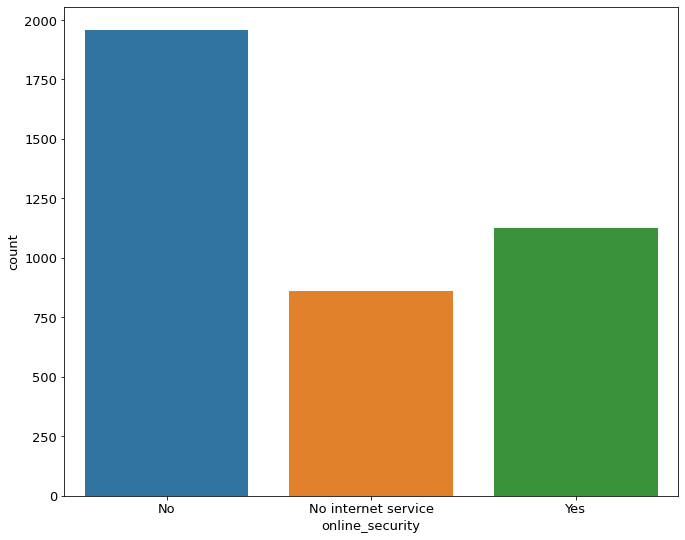

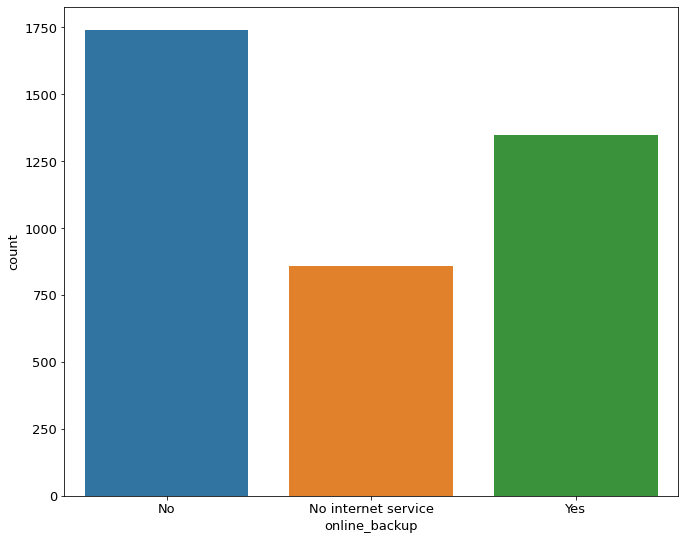

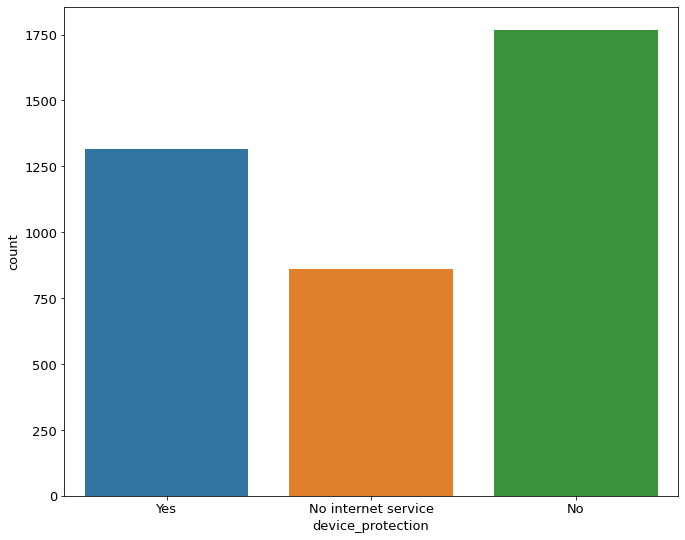

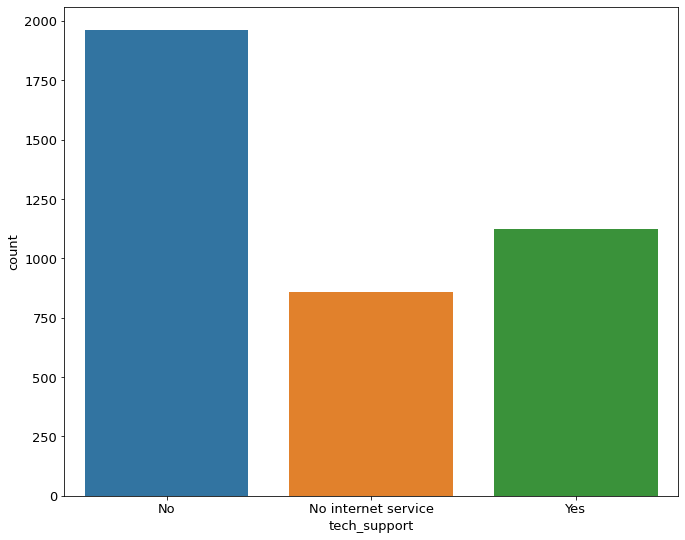

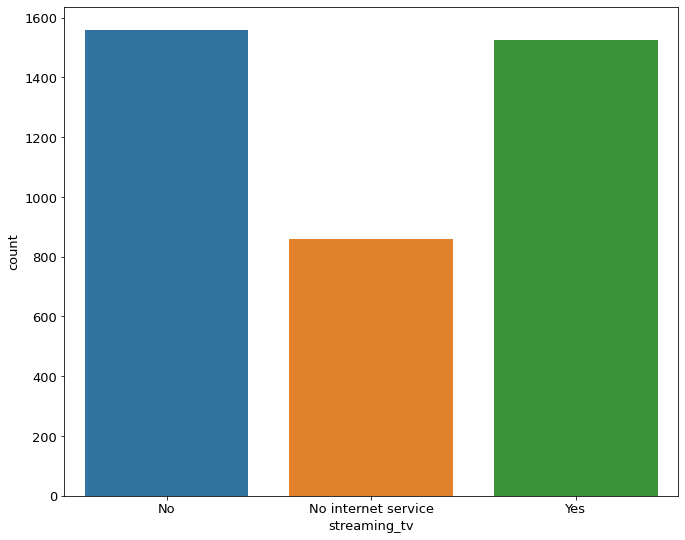

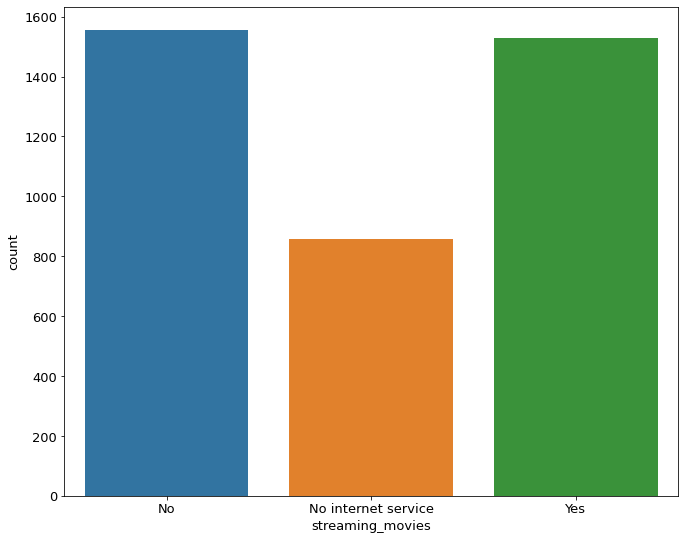

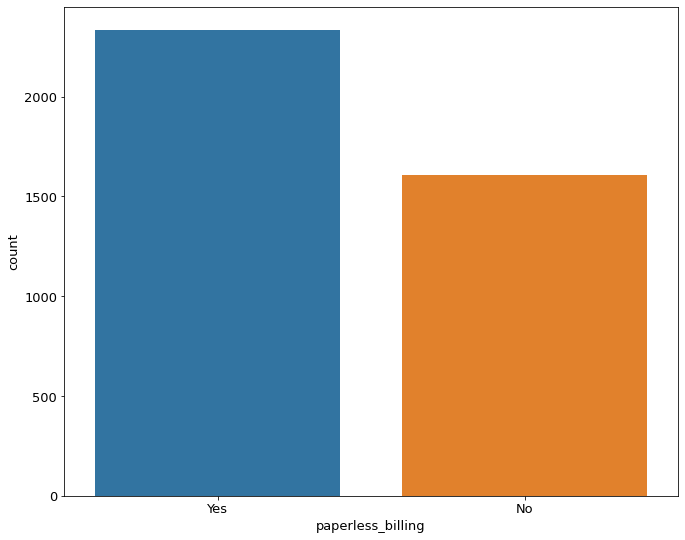

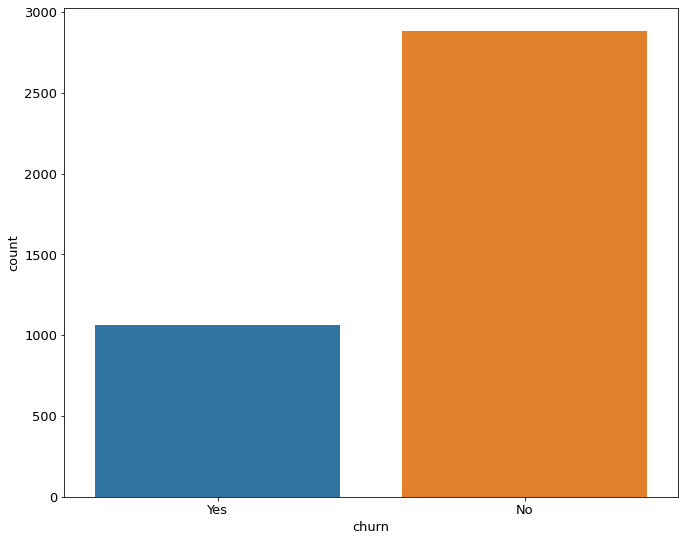

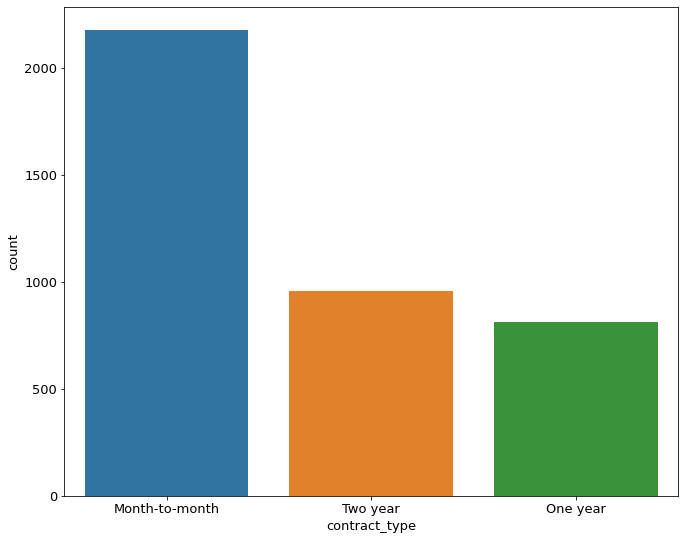

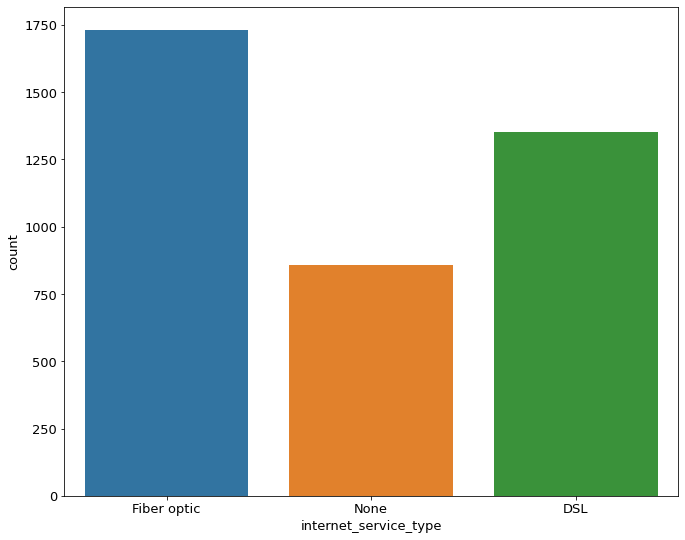

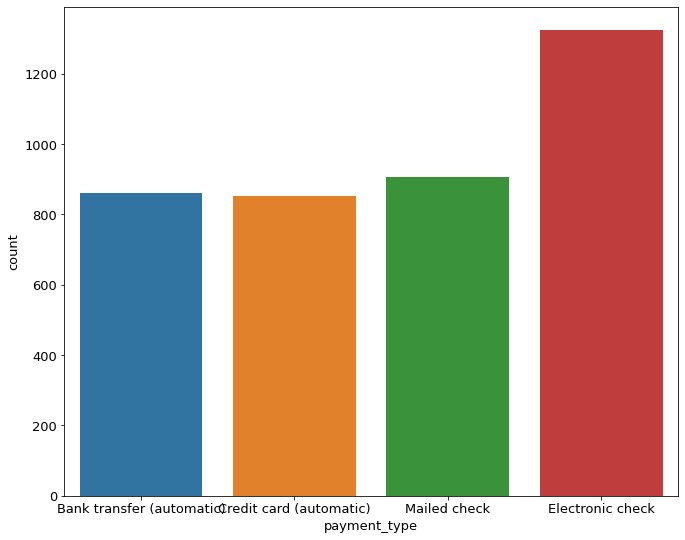

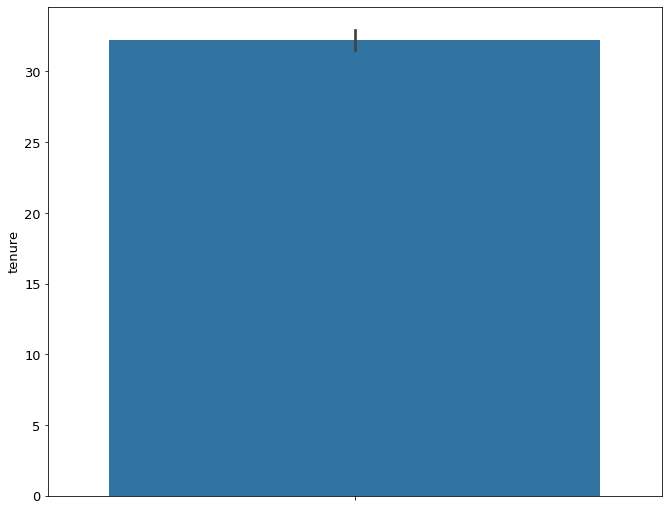

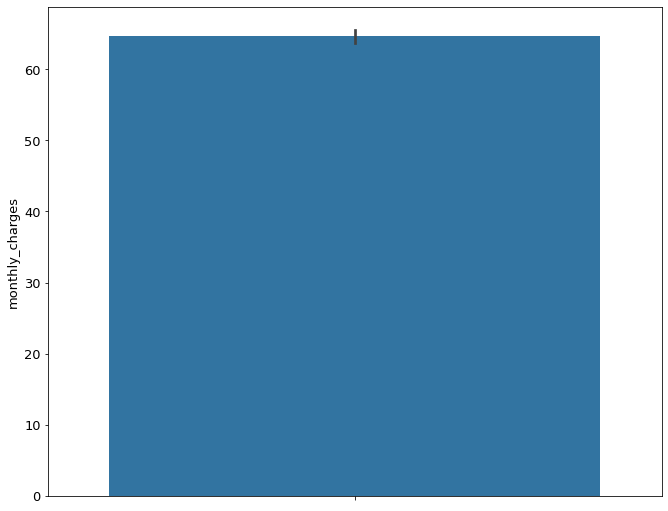

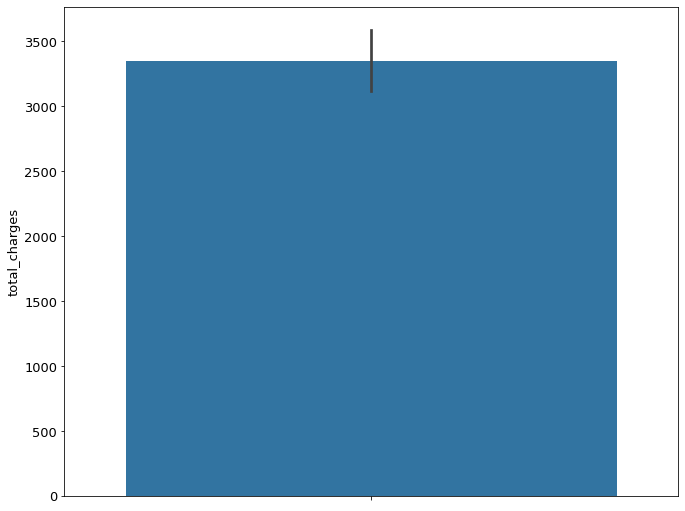

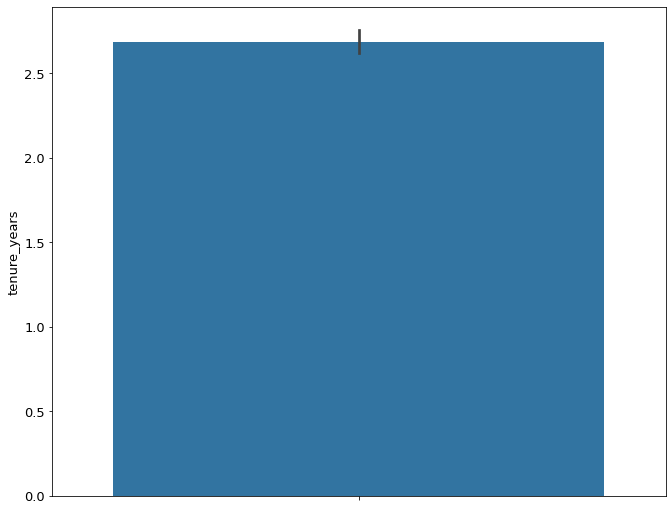

In [123]:
plot_categorical_and_continuous_vars(train, cat_vars, cont_vars)

In [124]:
explore.months_to_years(train)

In [125]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 4604 to 6958
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           3943 non-null   int64  
 1   internet_service_type_id  3943 non-null   int64  
 2   contract_type_id          3943 non-null   int64  
 3   customer_id               3943 non-null   object 
 4   gender                    3943 non-null   object 
 5   senior_citizen            3943 non-null   int64  
 6   partner                   3943 non-null   object 
 7   dependents                3943 non-null   object 
 8   tenure                    3943 non-null   int64  
 9   phone_service             3943 non-null   object 
 10  multiple_lines            3943 non-null   object 
 11  online_security           3943 non-null   object 
 12  online_backup             3943 non-null   object 
 13  device_protection         3943 non-null   object 
 14  tech_

#6. Explore your dataset with any other visualizations you think will be helpful.

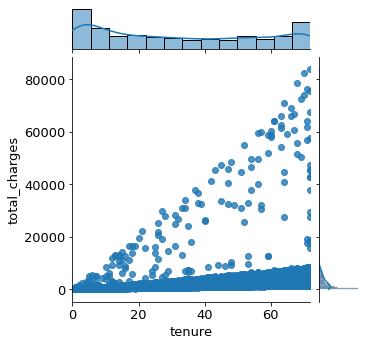

In [130]:
sns.jointplot(x="tenure", y="total_charges", data=train,  kind='reg', height=5);
plt.show()

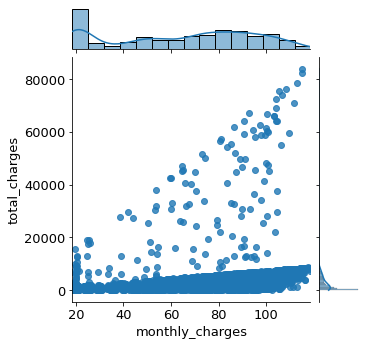

In [127]:
sns.jointplot(x="monthly_charges", y="total_charges", data=train,  kind='reg', height=5);
plt.show()

#7. In a seperate notebook, use the functions you have developed in this exercise with the mall customers dataset.